In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [315]:
dataset = pd.read_csv('SVMdataset.csv')

In [316]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [318]:
 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

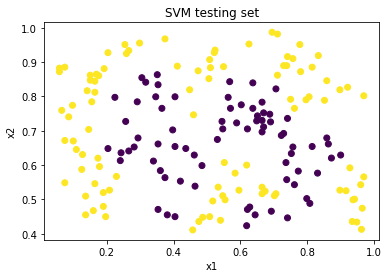

In [319]:
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)

plt.title('SVM testing set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

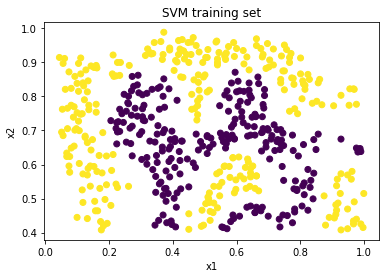

In [320]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

plt.title('SVM training set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

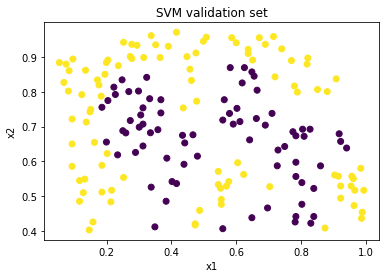

In [321]:
plt.scatter(X_val[:,0], X_val[:,1], c = y_val)

plt.title('SVM validation set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [322]:
from sklearn.svm import SVC
from sklearn import metrics

In [323]:
candidate_c = [500, 400, 300, 200, 100, 
               50, 40, 30, 20, 10, 
               5, 4, 3, 2, 1, 
               0.5, 0.4, 0.3, 0.2, 0.1, 
               0.05, 0.04, 0.03, 0.02, 0.01]
               
svclassifier = SVC(kernel='linear', C = 1000)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_val)

best_f1_score = metrics.f1_score(y_val, y_pred)

best_c = candidate_c[0]
for i in candidate_c:
    svclassifier = SVC(kernel='linear', C = i)
    svclassifier.fit(X_train, y_train)
    
    y_pred = svclassifier.predict(X_val)
    potential_f1_score = metrics.f1_score(y_val, y_pred)
    
    if potential_f1_score > best_f1_score:
        best_f1_score = potential_f1_score
        best_c = i

svclassifier = SVC(kernel='linear', C = best_c)
svclassifier.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

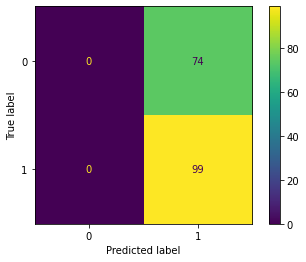

In [324]:
metrics.plot_confusion_matrix(svclassifier, X_test, y_test)

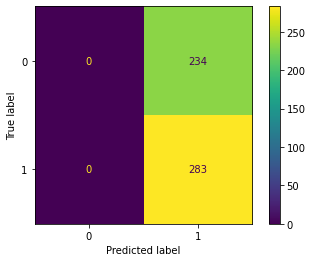

In [325]:
metrics.plot_confusion_matrix(svclassifier, X_train, y_train)

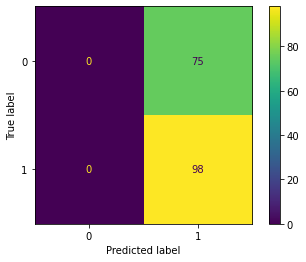

In [326]:
metrics.plot_confusion_matrix(svclassifier, X_val, y_val)

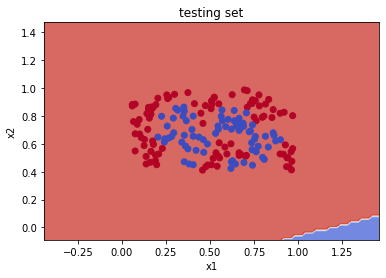

In [327]:
#decision boundary plot for the testing data

h = 0.02

x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svclassifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.title('testing set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

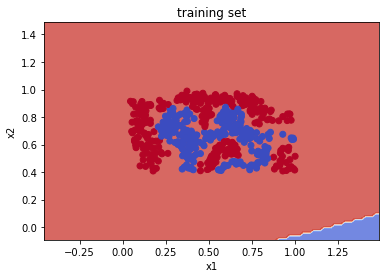

In [328]:
#decision boundary plot for the training data

h = 0.02

x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svclassifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('training set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

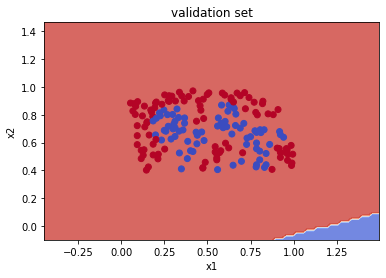

In [329]:
#decision boundary plot for the validation data

h = 0.02

x_min, x_max = X_val[:, 0].min() - 0.5, X_val[:, 0].max() + 0.5
y_min, y_max = X_val[:, 1].min() - 0.5, X_val[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svclassifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.coolwarm)
plt.title('validation set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [330]:
print('testing dataset')
print('---------------')

y_pred = svclassifier.predict(X_test)

print('accuracy = ', metrics.accuracy_score(y_test, y_pred))
print('precision = ', metrics.precision_score(y_test, y_pred))
print('recall = ', metrics.recall_score(y_test, y_pred))
print('F1 score = ', metrics.f1_score(y_test, y_pred))

testing dataset
---------------
accuracy =  0.5722543352601156
precision =  0.5722543352601156
recall =  1.0
F1 score =  0.7279411764705882


In [331]:
print('training dataset')
print('----------------')

y_pred = svclassifier.predict(X_train)

print('accuracy = ', metrics.accuracy_score(y_train, y_pred))
print('precision = ', metrics.precision_score(y_train, y_pred))
print('recall = ', metrics.recall_score(y_train, y_pred))
print('F1 score = ', metrics.f1_score(y_train, y_pred))

training dataset
----------------
accuracy =  0.5473887814313346
precision =  0.5473887814313346
recall =  1.0
F1 score =  0.7075


In [332]:
print('validation dataset')
print('------------------')

y_pred = svclassifier.predict(X_val)

print('accuracy = ', metrics.accuracy_score(y_val, y_pred))
print('precision = ', metrics.precision_score(y_val, y_pred))
print('recall = ', metrics.recall_score(y_val, y_pred))
print('F1 score = ', metrics.f1_score(y_val, y_pred))

validation dataset
------------------
accuracy =  0.5664739884393064
precision =  0.5664739884393064
recall =  1.0
F1 score =  0.7232472324723248


In [333]:
print('........................end of linear classifier.....................')

........................end of linear classifier.....................


In [334]:
candidate_c2 = [500, 400, 300, 200, 100, 
               50, 40, 30, 20, 10, 
               5, 4, 3, 2, 1, 
               0.5, 0.4, 0.3, 0.2, 0.1, 
               0.05, 0.04, 0.03, 0.02, 0.01]

candidate_gamma = [500, 400, 300, 200, 100, 
               50, 40, 30, 20, 10, 
               5, 4, 3, 2, 1, 
               0.5, 0.4, 0.3, 0.2, 0.1, 
               0.05, 0.04, 0.03, 0.02, 0.01]

               
svclassifier2 = SVC(kernel = 'rbf', C = 1000, gamma = 1000)
svclassifier2.fit(X_train, y_train)

y_pred2 = svclassifier2.predict(X_val)

best_f1_score2 = metrics.f1_score(y_val, y_pred2)

best_c2 = candidate_c2[0]
best_gamma = candidate_gamma[0]
for i in candidate_c2:
    for j in candidate_gamma:
        svclassifier2 = SVC(kernel='rbf', C = i, gamma = j)
        svclassifier2.fit(X_train, y_train)
    
        y_pred2 = svclassifier2.predict(X_val)
        potential_f1_score2 = metrics.f1_score(y_val, y_pred2)
    
        if potential_f1_score2 > best_f1_score2:
            best_f1_score2 = potential_f1_score2
            best_c2 = i
            best_gamma = j

svclassifier2 = SVC(kernel='rbf', C = best_c2, gamma = best_gamma)
svclassifier2.fit(X_train, y_train)

SVC(C=5, gamma=100)

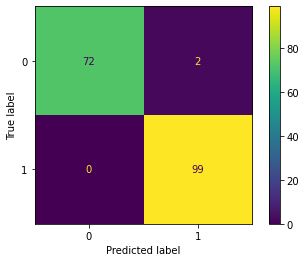

In [335]:
metrics.plot_confusion_matrix(svclassifier2, X_test, y_test)

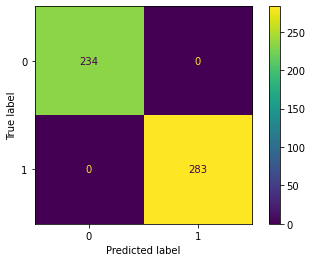

In [336]:
metrics.plot_confusion_matrix(svclassifier2, X_train, y_train)

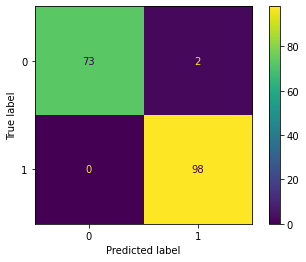

In [337]:
metrics.plot_confusion_matrix(svclassifier2, X_val, y_val)

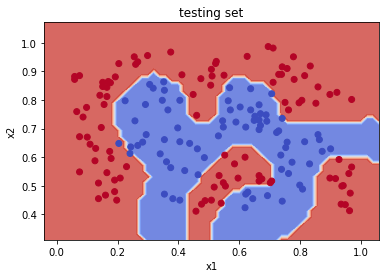

In [338]:
#decision boundary plot for the testing data

h = 0.02

x_min, x_max = X_test[:, 0].min() - 0.1, X_test[:, 0].max() + 0.1
y_min, y_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svclassifier2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.title('testing set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

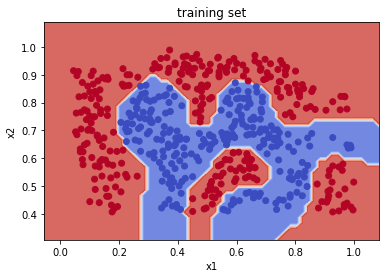

In [339]:
#decision boundary plot for the training data

h = 0.02

x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svclassifier2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('training set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

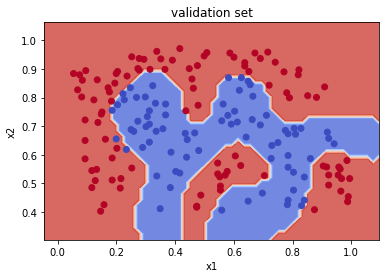

In [340]:
#decision boundary plot for the validation data

h = 0.02

x_min, x_max = X_val[:, 0].min() - 0.1, X_val[:, 0].max() + 0.1
y_min, y_max = X_val[:, 1].min() - 0.1, X_val[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svclassifier2.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap=plt.cm.coolwarm)
plt.title('validation set')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [341]:
print('testing dataset')
print('---------------')

y_pred2 = svclassifier2.predict(X_test)

print('accuracy = ', metrics.accuracy_score(y_test, y_pred2))
print('precision = ', metrics.precision_score(y_test, y_pred2))
print('recall = ', metrics.recall_score(y_test, y_pred2))
print('F1 score = ', metrics.f1_score(y_test, y_pred2))

testing dataset
---------------
accuracy =  0.9884393063583815
precision =  0.9801980198019802
recall =  1.0
F1 score =  0.99


In [342]:
print('training dataset')
print('----------------')

y_pred2 = svclassifier2.predict(X_train)

print('accuracy = ', metrics.accuracy_score(y_train, y_pred2))
print('precision = ', metrics.precision_score(y_train, y_pred2))
print('recall = ', metrics.recall_score(y_train, y_pred2))
print('F1 score = ', metrics.f1_score(y_train, y_pred2))

training dataset
----------------
accuracy =  1.0
precision =  1.0
recall =  1.0
F1 score =  1.0


In [343]:
print('validation dataset')
print('------------------')

y_pred2 = svclassifier2.predict(X_val)

print('accuracy = ', metrics.accuracy_score(y_val, y_pred2))
print('precision = ', metrics.precision_score(y_val, y_pred2))
print('recall = ', metrics.recall_score(y_val, y_pred2))
print('F1 score = ', metrics.f1_score(y_val, y_pred2))

validation dataset
------------------
accuracy =  0.9884393063583815
precision =  0.98
recall =  1.0
F1 score =  0.98989898989899
